#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random


#Dataset loading

In [ ]:
df = pd.read_csv('/content/sample_data/data_k_mean.txt', sep=' ', header=None)

#Plot Data

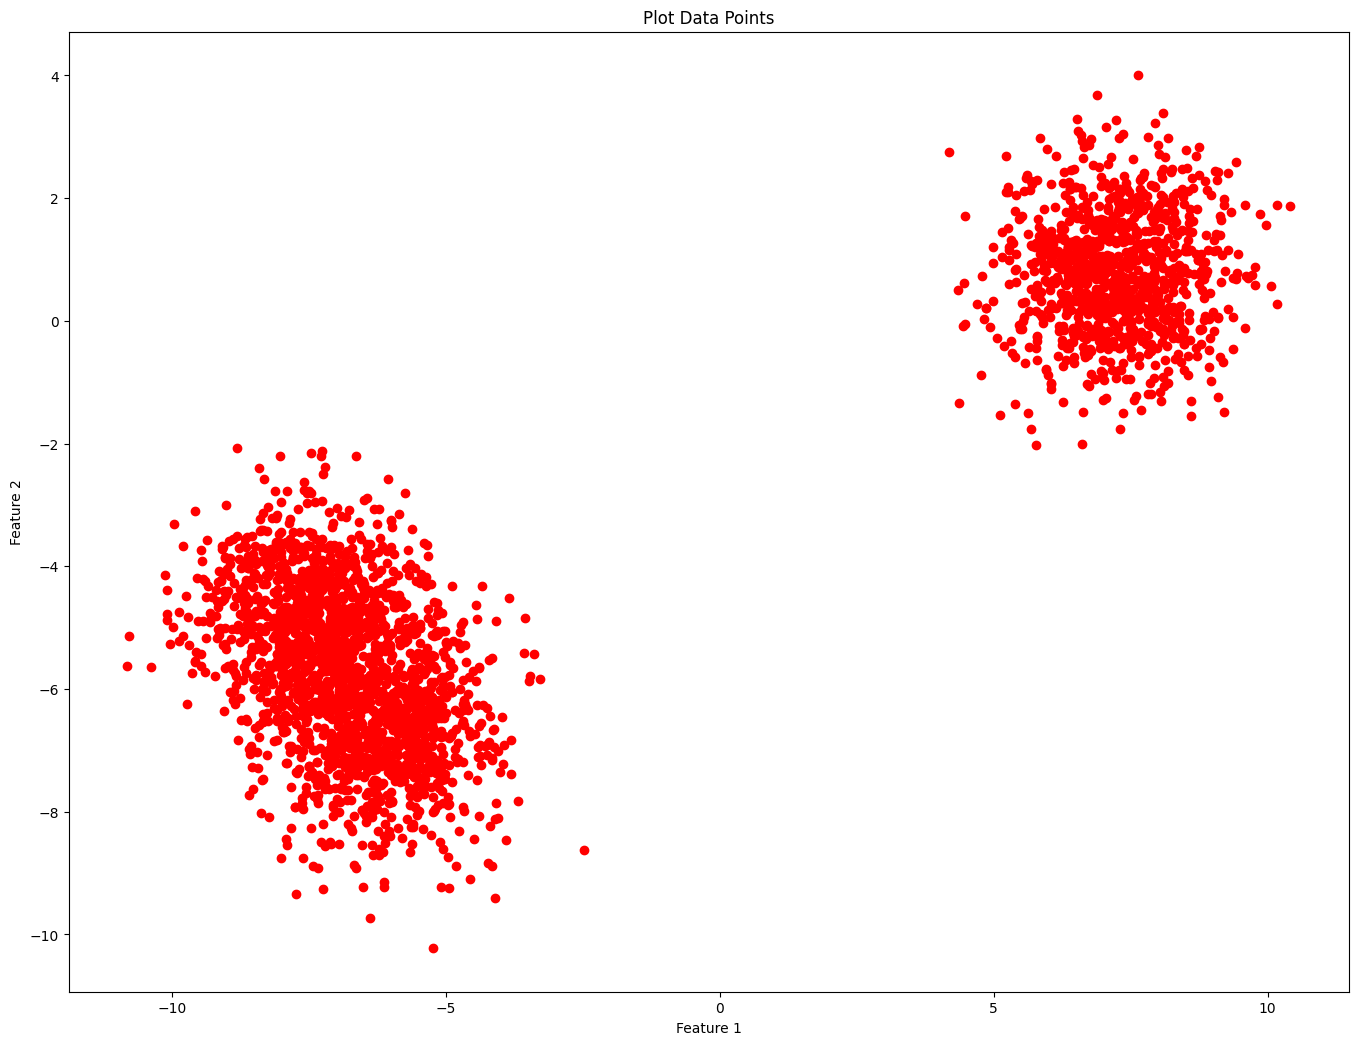

In [ ]:
input = np.array(df)
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.scatter(df[0], df[1], color='r')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Plot Data Points')
plt.show()

#Initializion of Centroids and K

In [ ]:
k = 2
centroids = np.array(df.iloc[np.random.randint(0, len(df), size=k)])

print("Initial Centroids:")
print(centroids)

Initial Centroids:
[[-6.11264 -5.38519]
 [-8.45293 -4.72791]]


#K means Clustering

In [ ]:

cls = []
for i in range(len(centroids)):
    cls.append([])

intermediate_centroids = np.zeros((len(centroids), 2))
stored_centroids = np.zeros((len(centroids), 2))
intermediate_centroids_counter = np.zeros((len(centroids)))

def euclidean_distance(point1, point2):
    return ((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)**0.5

def compute_centroid(data, cluster_no):
    global intermediate_centroids
    intermediate_centroids[cluster_no][0] = intermediate_centroids[cluster_no][0]+data[0]
    intermediate_centroids[cluster_no][1] = intermediate_centroids[cluster_no][1]+data[1]
    intermediate_centroids_counter[cluster_no] += 1

def set_new_centroids(centroid_x, centroid_y, centroid_no):
    centroids[centroid_no][0] = centroid_x
    centroids[centroid_no][1] = centroid_y

def reset_centroids():
    global intermediate_centroids, intermediate_centroids_counter, centroids
    for i in range(len(intermediate_centroids)):
        d = intermediate_centroids_counter[i]
        set_new_centroids(intermediate_centroids[i][0]/d, intermediate_centroids[i][1]/d, i)

    intermediate_centroids = np.zeros((len(centroids), 2))
    intermediate_centroids_counter = np.zeros((len(centroids)))


for x in range(500):
    #print('Iteration :', x+1, '\n', centroids, '\n')
    stored_centroids = centroids.copy()
    for i in range(len(input)):
        diff = 99999
        cluster_no = -1
        for j in range(len(centroids)):
            dist = euclidean_distance(input[i], centroids[j])
            if dist < diff:
                diff = dist
                cluster_no = j
        compute_centroid(input[i], cluster_no)
        #print(input[i], ' Belongs to Cluster : ', cluster_no+1)
        cls[cluster_no].append((input[i]))

    reset_centroids()
    print()
    if np.array_equal(centroids, stored_centroids):
        break

#Scatter plot

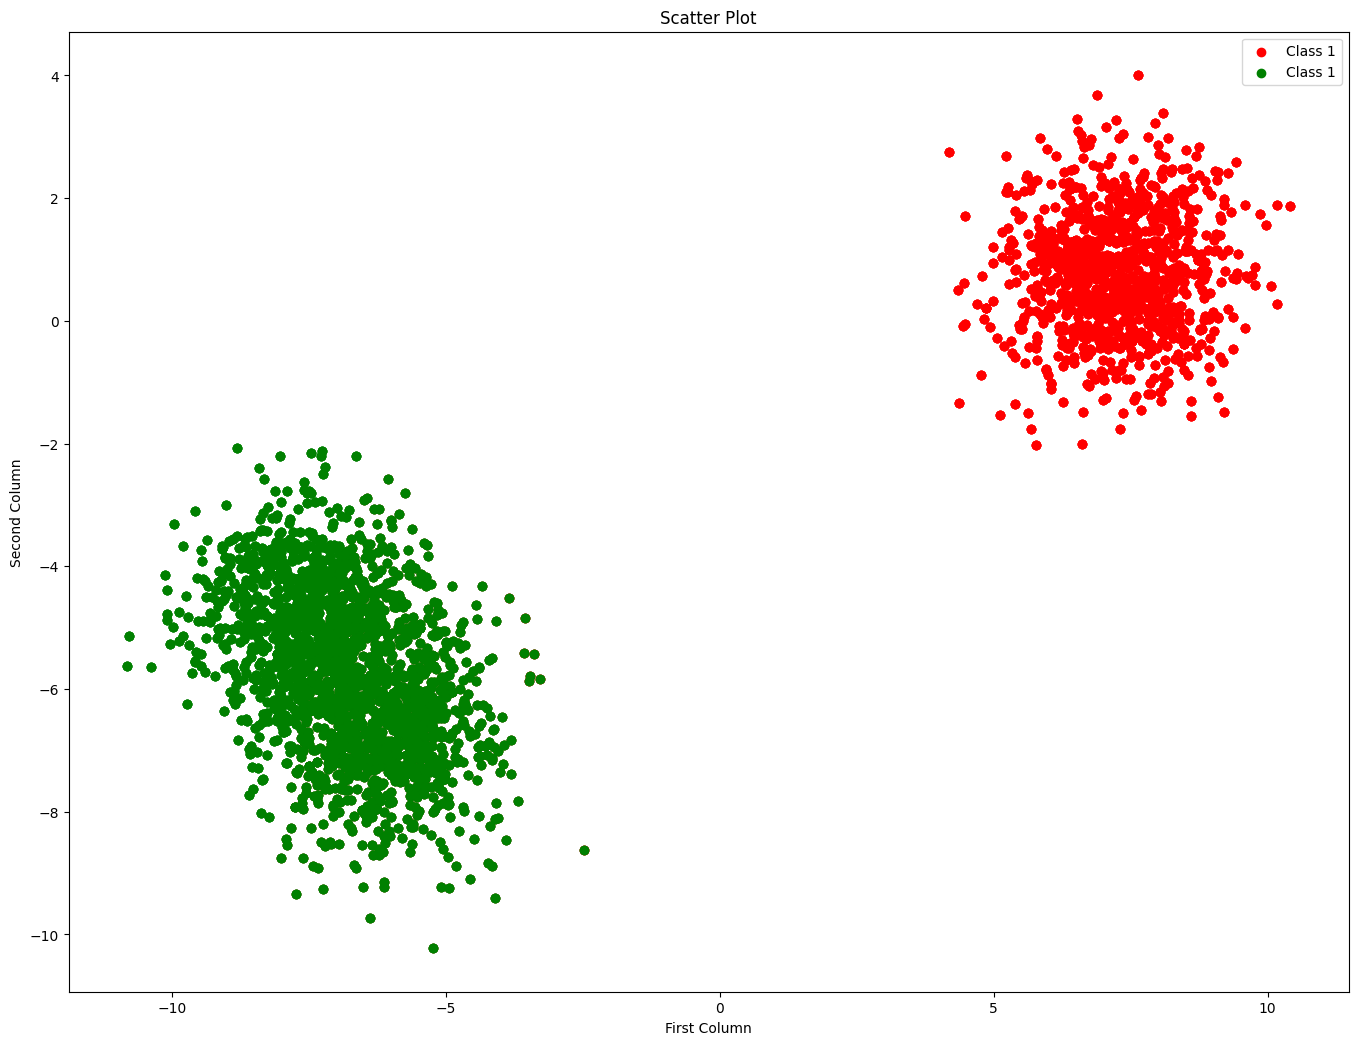

In [ ]:
colors = ['r','g','b']
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
for i in range(len(centroids)):
    df1 = pd.DataFrame(cls[i], columns = [0,1])
    ax.scatter(df1[0], df1[1], color=colors[i], label="Class 1")
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_title('Scatter Plot')
plt.legend(loc="upper right")
plt.show()